# Data Manipulation with Pandas

## Introducing DataFrames

Pandas is built on top of NumPy and Matplotlib

In [33]:
import pandas as pd
df = pd.read_csv("databases/homelessness.csv", index_col=0)

df.head()
df.tail()

,region,state,individuals,family_members,state_pop
46,South Atlantic,Virginia,3928.0,2047.0,8501286
47,Pacific,Washington,16424.0,5880.0,7523869
48,South Atlantic,West Virginia,1021.0,222.0,1804291
49,East North Central,Wisconsin,2740.0,2167.0,5807406
50,Mountain,Wyoming,434.0,205.0,577601


In [34]:
df.info()
df.shape
df.describe() #summary statistics for numeric columns 
df.values #data values in a 2d numpy array
df.columns #columns name
df.index #row number or row names

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64')

In [35]:
df.sort_values("state_pop") #sorting rows by a certain columns

df.sort_values("state_pop", ascending = False) #by default it is set to True

df.head(5)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [36]:
df.sort_values(["state_pop", "family_members"], ascending=[True, False]) 
df.head(5)
#firstly it sorts by state_pop and then by family_members

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [37]:
#Just an example
brics = pd.read_csv("databases/brics.csv")
brics[(brics['area'] > 8) & (brics['area'] < 10)]

,Unnamed: 0,country,capital,area,population
0,BR,Brazil,Brasilia,8.516,200.4
3,CH,China,Beijing,9.597,1357.0


### .isin() method

In [38]:
#To subset to only certain values in a single column
#instead of using & operator we can use .isin() method
df[df["state"].isin(["Alabama", "Alaska"])]

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139


## Aggregating Data

In [39]:
import pandas as pd

sales = pd.read_csv("databases/sales.csv", index_col=0)
sales["fuel_price_usd_per_l"].mean()

0.7497458438815591

In [40]:
def pct30(column):
    return column.quantile(0.3)

#The idea of agg is to apply a function to a column which will return single value
sales["fuel_price_usd_per_l"].agg(pct30)

0.7135290496934282

In [41]:
sales["fuel_price_usd_per_l"].cumsum()

0           0.679451
1           1.372903
2           2.091187
3           2.840115
4           3.554701
            ...     
10769    8074.146526
10770    8075.034144
10771    8075.946067
10772    8076.806211
10773    8077.761722
Name: fuel_price_usd_per_l, Length: 10774, dtype: float64

### Counting

In [42]:
sales.drop_duplicates(subset="store")

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316
5408,14,A,1,2010-02-05,32842.31,False,-2.605556,0.735455,8.992
6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350
7199,20,A,1,2010-02-05,46021.21,False,-3.377778,0.735455,8.187
8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237


In [43]:
round(sales["type"].value_counts(normalize=True),2)

type
A    0.92
B    0.08
Name: proportion, dtype: float64

In [44]:
sales["type"].value_counts(sort = True)

type
A    9872
B     902
Name: count, dtype: int64

### Grouped summary statistics

In [45]:
sales.groupby("type")["weekly_sales"].mean()

type
A    23674.667242
B    25696.678370
Name: weekly_sales, dtype: float64

In [46]:
sales.groupby("type")["weekly_sales"].agg(["min", "max", "sum"])

,min,max,sum
type,,,
A,-1098.0,293966.05,2.337163e+08
B,-798.0,232558.51,2.317840e+07


### Pivot tables

In [47]:
#Works pretty much the same as groupby
sales.pivot_table(values="weekly_sales", index="type") #by default it calculates the mean

,weekly_sales
type,
A,23674.667242
B,25696.678370


In [48]:
sales.pivot_table(values="weekly_sales", index="type", aggfunc="median")

,weekly_sales
type,
A,11943.92
B,13336.08


In [49]:
round(sales.pivot_table(values="weekly_sales", index="type", columns="store",
                   fill_value=0, margins=True))

store,1,2,4,6,10,13,14,19,20,27,31,39,All
type,,,,,,,,,,,,,
A,20897.0,26517.0,26127.0,21561.0,0.0,25664.0,30384.0,19931.0,28383.0,24207.0,18179.0,18415.0,23675.0
B,0.0,0.0,0.0,0.0,25697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25697.0
All,20897.0,26517.0,26127.0,21561.0,25697.0,25664.0,30384.0,19931.0,28383.0,24207.0,18179.0,18415.0,23844.0


## Slicing and Indexing Data

DataFrame pretty much contains out of numpy array for data and two indexes to store row and column details

In [50]:
#To set a new index
new_brics = brics.set_index("country")
new_brics

,Unnamed: 0,capital,area,population
country,,,,
Brazil,BR,Brasilia,8.516,200.40
Russia,RU,Moscow,17.100,143.50
India,IN,New Delhi,3.286,1252.00
China,CH,Beijing,9.597,1357.00
South Africa,SA,Pretoria,1.221,52.98


In [51]:
#To reset an index
new_brics.reset_index()

,country,Unnamed: 0,capital,area,population
0,Brazil,BR,Brasilia,8.516,200.40
1,Russia,RU,Moscow,17.100,143.50
2,India,IN,New Delhi,3.286,1252.00
3,China,CH,Beijing,9.597,1357.00
4,South Africa,SA,Pretoria,1.221,52.98


In [60]:
#To completely drop an index
new_brics.reset_index(drop=True)

,Unnamed: 0,capital,area,population
0,BR,Brasilia,8.516,200.40
1,RU,Moscow,17.100,143.50
2,IN,New Delhi,3.286,1252.00
3,CH,Beijing,9.597,1357.00
4,SA,Pretoria,1.221,52.98


It is important to deal with index, as it can be very helpful when it comes to subsetting data

In [57]:
new_brics.loc[["Russia", "Brazil"]]

,Unnamed: 0,capital,area,population
country,,,,
Russia,RU,Moscow,17.100,143.5
Brazil,BR,Brasilia,8.516,200.4


In [58]:
new_brics.sort_index()

,Unnamed: 0,capital,area,population
country,,,,
Brazil,BR,Brasilia,8.516,200.40
China,CH,Beijing,9.597,1357.00
India,IN,New Delhi,3.286,1252.00
Russia,RU,Moscow,17.100,143.50
South Africa,SA,Pretoria,1.221,52.98


We have revised loc and iloc, however i didn't find anything that would seem unusual to me, so i haven't write anything

In [61]:
pivot_brics = brics.pivot_table(index="capital", columns="country",
                                 values="area")
pivot_brics.mean(axis="index") #default value (calculates across row)

country
Brazil           8.516
China            9.597
India            3.286
Russia          17.100
South Africa     1.221
dtype: float64

## Creating and Visualizing Data

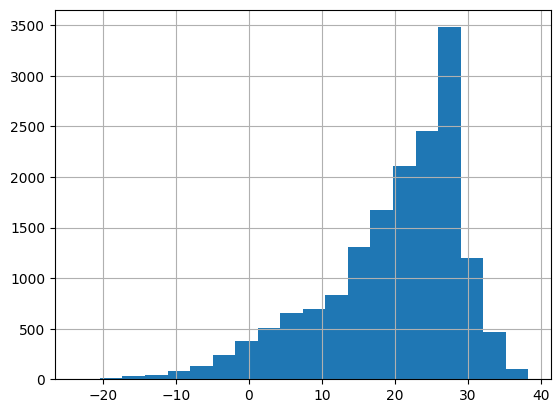

In [67]:
temperatures = pd.read_csv("databases/temperatures.csv", index_col=0)

temperatures["avg_temp_c"].hist(bins=20)
plt.show()

<Axes: title={'center': 'Temperature'}, xlabel='country'>

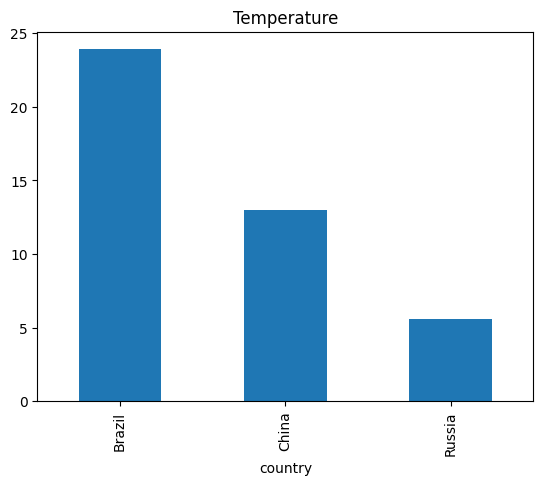

In [69]:
temperatures_short = temperatures[temperatures["country"].isin(["China", "Russia", "Brazil"])]
temperatures_grouped = temperatures_short.groupby("country")["avg_temp_c"].mean()

temperatures_grouped.plot(kind="bar", title="Temperature")

In [ ]:
#Copies from a lecture, do not run
#Line plot 

df.plot(x="date", y="weight_kg", kind="line", rot=45)

In [ ]:
#Copies from a lecture, do not run
#Scatter plot 
df.plot(x="height_cm", y="weight_kg", kind="scatter")


In [ ]:
#Copies from a lecture, do not run - multiple graphs on one plot

dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist(alpha=0.7)
dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist(alpha=0.7)

plt.legend(["F", "M"])
plt.show()

### Missing values

In [ ]:
import pandas as pd

brics = pd.read_csv("databases/brics.csv", index_col=0)
brics.isna()

In [ ]:
brics.isna().any()

In [ ]:
brics.isna().sum()

In [ ]:
brics.dropna()

In [ ]:
brics.fillna(0)

### Creating DataFrames

List of dictionaries

In [76]:
list_of_dicts = [
    {"name": "Ginger", "breed": "Dachshund", "height_cm": 22,
     "weight_kg": 10, "date_of_birth": "2019-03-14"},
    {"name": "Scout", "breed": "Dalmatian", "height_cm": 59,
     "weight_kg": 25, "date_of_birth": "2019-05-09"},
]

df = pd.DataFrame(list_of_dicts)
df

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


Dictionary of lists

In [77]:
dict_of_lists={
    "name": ["Ginger", "Scout"],
    "breed": ["Dachshund", "Dalmatian"],
    "height_cm": [22, 59],
    "weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14", "2019-05-09"],
}

df2 = pd.DataFrame(dict_of_lists)
df2

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


### Reading and Writing a CSV

In [ ]:
brics = pd.read_csv("databases/brics.csv")

In [ ]:
brics.to_csv("new_brics.csv")